# Day 1

## Part 1: Exploratory Data Analysis and Pre-processing

In this module you will learn how to load the online retail dataset in Python, visualise and summarise it to produce insights that will guide your machine learning endevours in the next modules. We will learn how to plot data and calculate summary statistics to build a dataset from which we ultimately will try to predict future customer behaviour.

### Learning Activity - Loading Libraries

First we need to load the required Python libraries. Libraries are like extensions to the base `python` that add functionality or help to make tasks more convenient to do. We will load some libraries that will boost your data handling capacity.

The main ones include `numpy` and `pandas`, which are the most prominent libraries to work efficiently with data in python. Here we just use the `import` function to, you guessed it import the pandas library and make it accessible `as` `pd` in the following code to save some typing (4 characters to be precise...). Then we load `matplotlib` and `seaborn` which are libraries that will help you to visualise the data. Visualisation of a dataset is key to getting a good understanding of what it is made before applying more involved machine learning algorithms. You will learn how handy it is to start formulating hypotheses and to evaluate output from data processing you will be doing.

### Learning Activity - Loading the dataset

In a first step we load the dataset with `pandas`. To achieve this you will use the `.read_csv()` method. We just need to point to the location of the dataset and indicate under what name we want to store the data, i.e. `retail`, and `pandas` will do the rest. In the `read_csv()` function, the `parse_dates` parameter is a boolean or list of ints or names or list of lists or dict, which by default is set to False. In this case, we are passing the name 'InvoiceDate' that represents the corresponding column. More details on how to use `parse_dates` can be found http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. 

At a first stage, the data has only been loaded. Let's have a look at the top few lines - we can use the `.head()` method to achieve this.

## The dataset

The dataset is based on data from an online retailer selling gifts and is based on a dataset taken from [here](https://archive.ics.uci.edu/ml/datasets/Online+Retail#).

![Giftshop](img/giftshop.jpg)

We have taken the original data set and processed it to create a 'profile' for each customer, which includes a number of features including:

* `Country`: The country their purchases were made from.
* `balance`: Amount of money spent at the store (purchases minus returns).
* `n_orders`: Total number of orders from the online retailer.
* `time_between_orders`: Average time (in days) between orders.
* `max_spent`: Most amount of money customer spent on a single order.
* etc.

Load the data using `pd.read_csv()` and use the `.head()` method to take a look at it:

In [217]:
# Import the data and explore the first few rows
import pandas as pd
import numpy as np

customers = pd.read_csv('data/online_retail_afterEDAstep1.csv')
customers.head(10)

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.60,38591.800000,0.00,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
1,12348,Finland,3874.60,2248.80,1291.533333,478.80,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,Norway,294.40,294.40,294.400000,294.40,1.0,NaN,196.0,0.0,0.00,294.40
3,12352,Norway,1845.13,1054.10,393.092000,0.00,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,Spain,1079.40,1079.40,1079.400000,1079.40,1.0,NaN,530.0,0.0,0.00,1079.40
5,12356,Portugal,6621.63,5011.34,3310.815000,1610.29,2.0,80.000000,4455.0,0.0,0.00,6621.63
6,12358,Austria,404.86,404.86,404.860000,404.86,1.0,NaN,98.0,0.0,0.00,404.86
7,12360,Austria,4359.34,2984.60,2179.670000,1374.74,2.0,88.000000,2116.0,0.0,0.00,4359.34
8,12361,Belgium,174.90,174.90,174.900000,174.90,1.0,NaN,90.0,0.0,0.00,174.90
9,12362,Belgium,4700.73,1437.00,787.255000,0.00,6.0,58.000000,2929.0,-10.0,-22.80,4723.53


It is also good practice to **always** check the dimensionality of the input data using the `shape` command to confirm that you really have imported all the data in the correct way and format (e.g. one common mistake is to get the separator wrong and end up with only one column).

In [218]:
# Check the dimensionality of the input data

print(customers.shape)

(3254, 12)


## Exploring the dataset

At this stage we do not really know what is going on in this dataset. We need to get beyond the first impression. How about trying to answer some simple questions like:

* How many customers are we dealing with?
* What country spends how much?
* What has been the company's profit during the last year?
* Are there differences between customers that return and those who don't?

We will go through these questions and learn new tricks as we move along. But before we get started, it is worth to have a little bit more background on what `pandas` is made of.

### Data selection with Pandas

Throughout this bootcamp you will be using `pandas` which is a python library that makes it muuuuuch more convenient to work with data than the base `python` methods. `pandas` is built on top of `numpy`, which is the library that brings efficient numerical operations to `python`. As the author of `pandas` Wes McKinney puts it: '*pandas provides high level data manipulation tools built on top of NumPy*'. `pandas` takes care of making it easy to work with tabular data in providing selections, merging, calculating statistics, filling in missing values and provides solutions to many other challenges that would be cumbersome to overcome with base `python`.

When you load data into python with `pandas` it is put into a special structure called a `DataFrame`. `DataFrame`s are what makes `pandas` so convenient to work with for data analysis. It is worth to take the time to understand what kind of an object a `DataFrame` is, or in other words what it is made of in order to get all the benefits it has on offer.

![Table Anatomy Class](./img/online_retail_table_anatomy.png)

You are familiar with what a table is, it has column and rows and often these are annotated with column labels and row labels respectively. But how are table encoded with `pandas`. The raw data is stored in `numpy` **arrays** and this is where `pandas` can leverage all the numerical data processing.

To add more convenient selection on top of this array, it is encoded in a so-called `pd.Series`, which can be thought of as a table with a single column. Crucially a `pd.Series` can have a (column) label and row labels. Also a `pd.Series` will store data of a given type, i.e. numbers, words, times. Row labels are called indexes in `pandas` and they are very important for a lot of `pandas` and we will introduce some later in the module. The `pd.Series` comes with many of the convenience functions that are included in `numpy`, such as `.sum()`, `.max()` etc. However, is has some additional functionality that `numpy` is missing. For instance it is very easy to count the unique number of entires in a pd.Series by simply using the `.nunique()` method.

Finally a bunch of `pd.Series` in one table constitute the `DataFrame`, with column labels and an index. Crucially, `DataFrame`s can have different types of data in different columns, which is essential when representing tables. Within a `DataFrame`, the different columns of the table can easily be accessed via the *name* of the columns. Similarly, you can select individual rows via the indices.

In this primer you will go though a lot of the basic pandas functionality and try to understand how they are build so it will be easier to maniputate them later.

### Learning Activity - How many?

Remember one of the questions from before? How many customers are we dealing with? Let's have a look.

First we need to select the `CustomerID` column, which we do with the square brackets (`[]`). This yields a `pd.Series` only containing `CustomerID` column. From this we can then count the unique values with the `.nunique()` function that is conventiently provided for `pd.Series`.

In [219]:
# Apply the nunique() function on the column 'CustomerID'

customers['CustomerID'].nunique()

3254

The `apply()` function will automatically go through all the columns and return the number of unique values in each column. We can also use the `.apply()` function to check for columns with missing values. We will be relying on the `.apply()` method a lot, so be sure that you understand it!

In [220]:
pd.isnull(customers).sum() # how many NaNs are there in each column?

CustomerID                 0
Country                    0
balance                    0
max_spent                  0
mean_spent                 0
min_spent                  0
n_orders                   0
time_between_orders     1368
total_items                0
total_items_returned       0
total_refunded             0
total_spent                0
dtype: int64

What might be the reason why some customers have 'NA' as their time between orders?

In general, for columns with missing values, there are a few choices on how to handle them. This process is usually called 'imputation'.

If they are categorical, one strategy is to replace missing values with the mode (most often category) and another strategy is to simply assign them a new category such as 'missing'. If they are missing at random, the second choice will provide little extra information, but if they are non-randomly missing (i.e. their missingness is related to one or more other variables in the set), then this strategy may provide extra information.

If the missing values are from continuous measures, we can impute with the mean or the median. In some cases, it may even be possible to impute missing values using other features in the data set by exploiting relationships between features.

### Types of features

Data can be both *continuous* (in this case, for instance, the amount of money spent in the store) or *categorical* (in this case, the country).

Categorical variables that have a notion of ordering (for instance, a survey that asks your satisfaction from scale of one to five) are called *ordinal*.

In the feature engineering step, we frequently need to pay special attention to the categorical variables as many models will not be equipped to handle this type of data, particularly if they are not ordinal.

## Learning Activity: Mapping Categorical Features

As previously mentioned, most machine learning libraries and tools will only accept numerical values as their input. In the case where we have categorical features present, we need to represent them as numerical values. Unlike the label encoding we demonstrated previously for the class vector, when dealing with categorical input features, typically one converts each categorical feature using “one-hot encoding”. The input in one-hot encoding is the vector of discrete categorical values, and the output will be a sparse matrix where each column corresponds to one possible value of one feature.

In our example, the feature Country is a categorical feature with values such as ["Finland", "Norway", "Spain"] etc. Such features can be easily mapped to dummy variables which could be expressed as [0, 1, 2]. Can you spot any problem though with this approach? Even though the country values do not come in any particular order, a machine learning algorithm will now assume that "Spain" is larger than "Norway", and "Norway" is larger than "Finland", and so on. Although this assumption is incorrect, the algorithm could still produce useful results. However, those results would not be optimal.  

The correct approach in this case is to apply one-hot encoding. This estimator transforms each unique categorical value of a single input categorical feature to a new dummy **feature**. So, for our 11 unique country values (remember the learning activity from day 1), we will end up with 10 new dummy features after one-hot-encoding. 

There are plenty of libraries and functions that are used for one-hot encoding. In this example, we will use the `get_dummies()` function from `pandas`.

Make sure to add `countries = countries.set_index(customers['CustomerID'])` after you define it so we can join it together with customers later on.

In [223]:
# Apply one-hot encoding to the categorical feature Country
countries = customers['Country']
countries = pd.get_dummies(countries)
countries = countries.set_index(customers['CustomerID'])
countries.head()

,Austria,Belgium,Finland,France,Germany,Italy,Norway,Portugal,Spain,Switzerland,United Kingdom
CustomerID,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,1
12348,0,0,1,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,1,0,0,0,0
12352,0,0,0,0,0,0,1,0,0,0,0
12354,0,0,0,0,0,0,0,0,1,0,0


We can drop the original 'Country' column and keep this one. We are going to do pre-processing and imputation on the continuous features, so let's keep this separate for now and join it together later.

In [224]:
customers = customers.drop('Country', axis = 1)

#customers = customers.join(countries)
#customers.head()

### Learning Activity - Imputation

We should first take care to replace the missing values in the dataset as they prevent machine learning algorithms to run. There are many strategies to help with missing data and they depend on whether the missing data is numeric or categorical.

* simply removing rows where there is missing data (e.g. `.dropna()` can achieve this)
* imputing the values with a summary statistic such as mean or median or most frequent value (e.g. `Imputer` from `sklearn` module)
* replace the values with a resonable estimate

What strategy is best for you problem very much depends on the specifics of your dataset. However generally speaking it is not worth to remove large chunks of data.

In our case the missing values are exclusively found in the `time_between_orders` column, so we should have a look at these rows where this occurs.

In [225]:
# Find the instances where the time_between_orders is empty
nan_customers = customers[pd.isnull(customers['time_between_orders'])]

# How many nan cases do we have? 
print(nan_customers.shape)

(1368, 11)


Eyeballing the table we can see that only in the rows where we have a single order (`n_orders == 1`) that the `time_between_orders` is `NaN`, i.e. Not a Number. That makes immediate sense and indicates that these customers have not yet returned for anther purchase.

A reasonable strategy here would be to replace the `NaN` values by the longest time period (in days) that we would expect a customer to be returning, e.g. 365 days. So let's replace all the `NaN` values with the `pandas` method `.fillna()`.

In [226]:
# Take the empty values (NAs) from the column 'time_between_orders' and fill them with the value 365

customers['time_between_orders'] = customers['time_between_orders'].fillna(365)
customers.head()

,CustomerID,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,0.00,77183.6,38591.800000,0.0,2.0,365.000000,74215.0,-74215.0,-77183.60,77183.60
1,12348,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,294.40,294.4,294.400000,294.4,1.0,365.000000,196.0,0.0,0.00,294.40
3,12352,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,1079.40,1079.4,1079.400000,1079.4,1.0,365.000000,530.0,0.0,0.00,1079.40


### Learning Activity - Removing Outliers

Now let's move on to taking care of the blatant outliers. An outlier is an observation that appears extreme relative to the rest of the data. Some ML techniques are sensitive to outliers and it's better to remove these samples before proceeding.

There are again many strategies to deal with this scenario. The real question that we need to answer is at what point we consider a value extreme and whether it is really legitimate to remove it from the observations.

Here we have defined a simple function that provides for a straighforward way of removing observations that are `k` standard deviations (`sigma`) away from the mean (`mu`) of a distribution.

Assuming that the data is normally distributed, approximately 99.7% (almost everything) of the data falls within three standard deviations of the mean. Under this assumption we are considering as outliers only samples with very unlikely values for a features.

In [227]:
# This function defines what datapoints we consider 

def remove_outliers(data, k=3):
    mu = data.mean()  # get the mean
    sigma = data.std()  # get the standard deviation
    filtered_data = data[np.abs((data - mu) / sigma) < k]  # filter values based on distance from mean
    return filtered_data

You can `.apply()` this function. In case that the value is decalred an outlier, its value is replace by `NaN`, keeping the structure of the `pd.DataFrame` intact. However it only operates on numerical columns. Therefore, we first need to some `pd.DataFrame` processing.

In [228]:
# Apply the remove_outliers function to the customers dataframe and display the first few rows

customers = customers.apply(remove_outliers)
customers.head()

,CustomerID,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,0.00,NaN,NaN,0.0,2.0,365.000000,NaN,NaN,NaN,NaN
1,12348,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,294.40,294.4,294.400000,294.4,1.0,365.000000,196.0,0.0,0.00,294.40
3,12352,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,1079.40,1079.4,1079.400000,1079.4,1.0,365.000000,530.0,0.0,0.00,1079.40


Let's now remove the `NaN` values. This can easily be achieve with the `.dropna()` method that takes care of all the rows with a single occurence of `NaN` value.

In [229]:
customers = customers.dropna()
customers.head()

,CustomerID,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
1,12348,3874.60,2248.80,1291.533333,478.80,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,294.40,294.40,294.400000,294.40,1.0,365.000000,196.0,0.0,0.00,294.40
3,12352,1845.13,1054.10,393.092000,0.00,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,1079.40,1079.40,1079.400000,1079.40,1.0,365.000000,530.0,0.0,0.00,1079.40
5,12356,6621.63,5011.34,3310.815000,1610.29,2.0,80.000000,4455.0,0.0,0.00,6621.63


### Learning Activity - Scaling

Often when we are working with multidimensional data, the data have different units and thus exist on different scales. When comparing the data internally, or when the values map to similar space, then that is not a problem. However if a dimensions is in the millions, e.g. population of a country, and an others dimension in the few hundreds, e.g. number of hospitals, then there can be an uneven impact of the dimensions with higher values.

You can easily visualise this with a `boxplot`. `boxplot` represent essential statistics that describe distributions; from bottom to top, the horizontal lines of the box represent the first quartile (`Q1`), the median and third quartile (`Q3`). The distance between `Q1` and `Q3` is called inter quartile range (`IQR`). The whiskers of the boxes on the top and bottom are defined as `Q1 - 1.5 x IQR` and `Q3 - 1.5 x IQR` respectively.

We will be using the `seaborn` library for many of the plots we will produce. It is based on the `python` classic `matplotlib`. In a nutshell we define plot objects that can have a variety of properties, e.g. type of plots, dataset, data mapped to x-axis etc. Then we use `seaborn`'s helper functions that take care of most of the plotting setup to produce a graph where many reasonable presets have been set.

In this way there is a whole range of plot types that can be quickly produced. Have a look [here](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html) for a gallery of plots possible with `seaborn`.

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

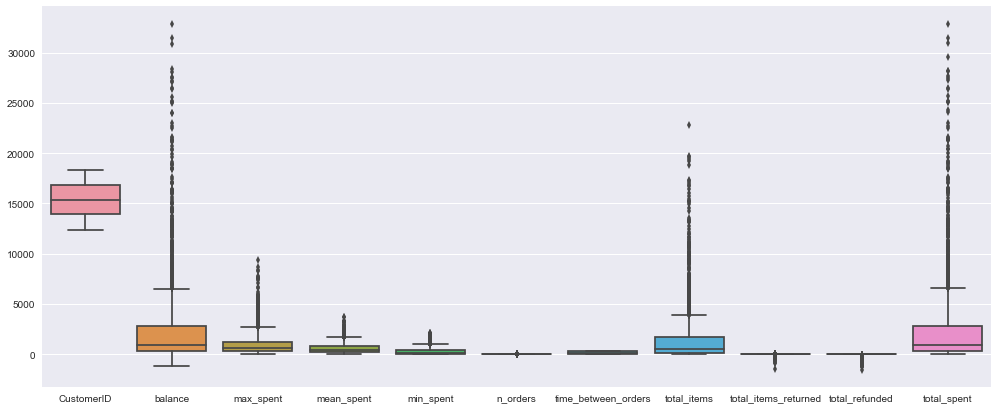

In [231]:
# Plot a sns.boxplot() of the customer dataframe, but just take the first

plt.figure(figsize=(17, 7))
g = sns.boxplot(data=customers)
plt.show()

Of course, the countries that we one-hot encoded only have value zero or one. The customer ID is also just an identifier so we should make it an index.

Besides this, you can see that `n_orders` is defined in a much narrower space than `balance`. If you were to use the data in an unscaled form, the effect of `balance` might be disproportionnaly high.

To account for this you can scale your data, so that all the dimensions fall onto the same space. We use a simple function from the `sklearn` library for this purpose. Namely we use the `StandardScaler()`. In the coming sections of the bootcamp we will be using `sklearn` extensively.

In [232]:
customers = customers.set_index('CustomerID')

In [233]:
from sklearn.preprocessing import StandardScaler

# Initialise the scaler
scaler = StandardScaler()  #  OR scaler = MinMaxScaler()

# Apply auto-scaling (or any other type of scaling) and cast to DataFrame 
customers = pd.DataFrame(scaler.fit_transform(customers), columns = customers.columns, index = customers.index)

# Print the first rows
customers.head()

,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,
12348,0.383285,1.250693,1.431525,0.513598,-0.134499,-0.866715,2.257327,0.177632,0.250957,0.375547
12350,-0.555081,-0.636253,-0.573046,0.022799,-0.695840,1.135111,-0.522217,0.177632,0.250957,-0.557665
12352,-0.148636,0.097227,-0.374642,-0.760775,0.426842,-1.145015,-0.281712,-1.054751,-1.146316,-0.122088
12354,-0.349333,0.121654,1.005066,2.112152,-0.695840,1.135111,-0.383240,0.177632,0.250957,-0.353048
12356,1.103279,3.917886,5.490954,3.525167,-0.415170,-0.702314,1.249951,0.177632,0.250957,1.091586


Let's replot the `boxplot`.

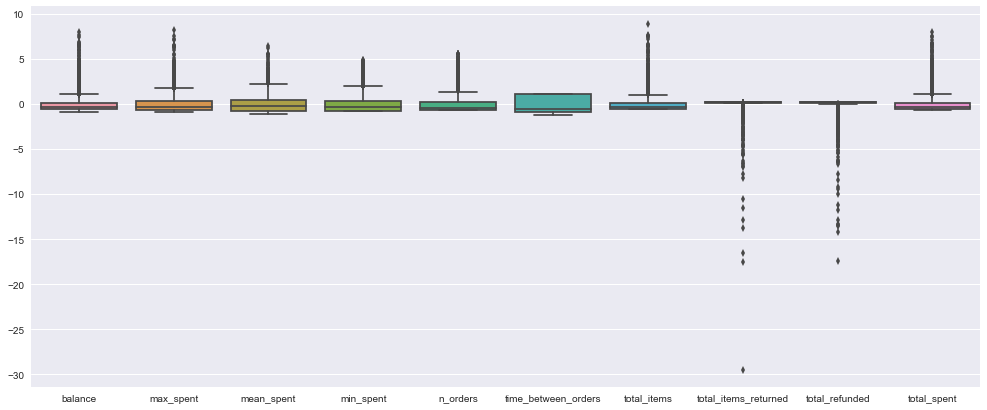

In [234]:
# Replot the boxplot with the scaled data

plt.figure(figsize=(17, 7))
g = sns.boxplot(data=customers)
plt.show()

Let's save our customers after feature engineering and scaling to the `data` directory using `customers.to_csv()` and call it `customers_after_FEng.csv`:

In [269]:
# Import the data from the retail_ml_dataset.csv, 
# set the index column and explore the first few rows
customers.to_csv('data/customers_after_FEng.csv')

### Learning Activity - Investigate the relationship between input features

Visualisation is an integral part of Data Science. Exploratory data analysis (EDA) is the field dealing with the analysis of data sets as a means of summarising their main characteristics, most often using visual methods.

One of the most powerful tools commonly used as part of EDA is the scatter plot. This step helps visualise the relationship in-between two input features, indicates the degree of correlation plus helps reveal any patterns and trends in the data, and may also give you a first indication of the ML model that could be applied and its complexity (linear vs. non-linear). 

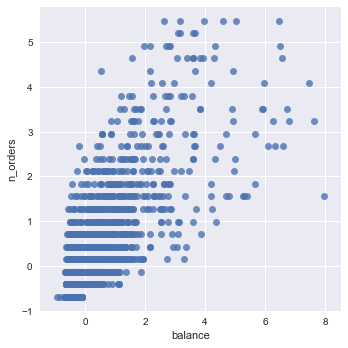

In [235]:
# Create a scatter plot of 'balance' vs. 'n_orders'

ax = sns.lmplot(x='balance', y='n_orders', data=customers, fit_reg=False)
plt.show()

### Test Activity - Create a scatterplot of different features

Try once more creating an enhanced scatterplot as before, but this time using the features 'balance' and 'total_spent'. What do you observe? 

### Bonus Activity - Try different combinations of the input features in a grid/scatterplot matrix

A scatterplot matrix shows a grid of scatterplots where each attribute is plotted against all other attributes. You can find further information on how to create a scatterplot matrix with seaborn using the pairplot() function at https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html. 


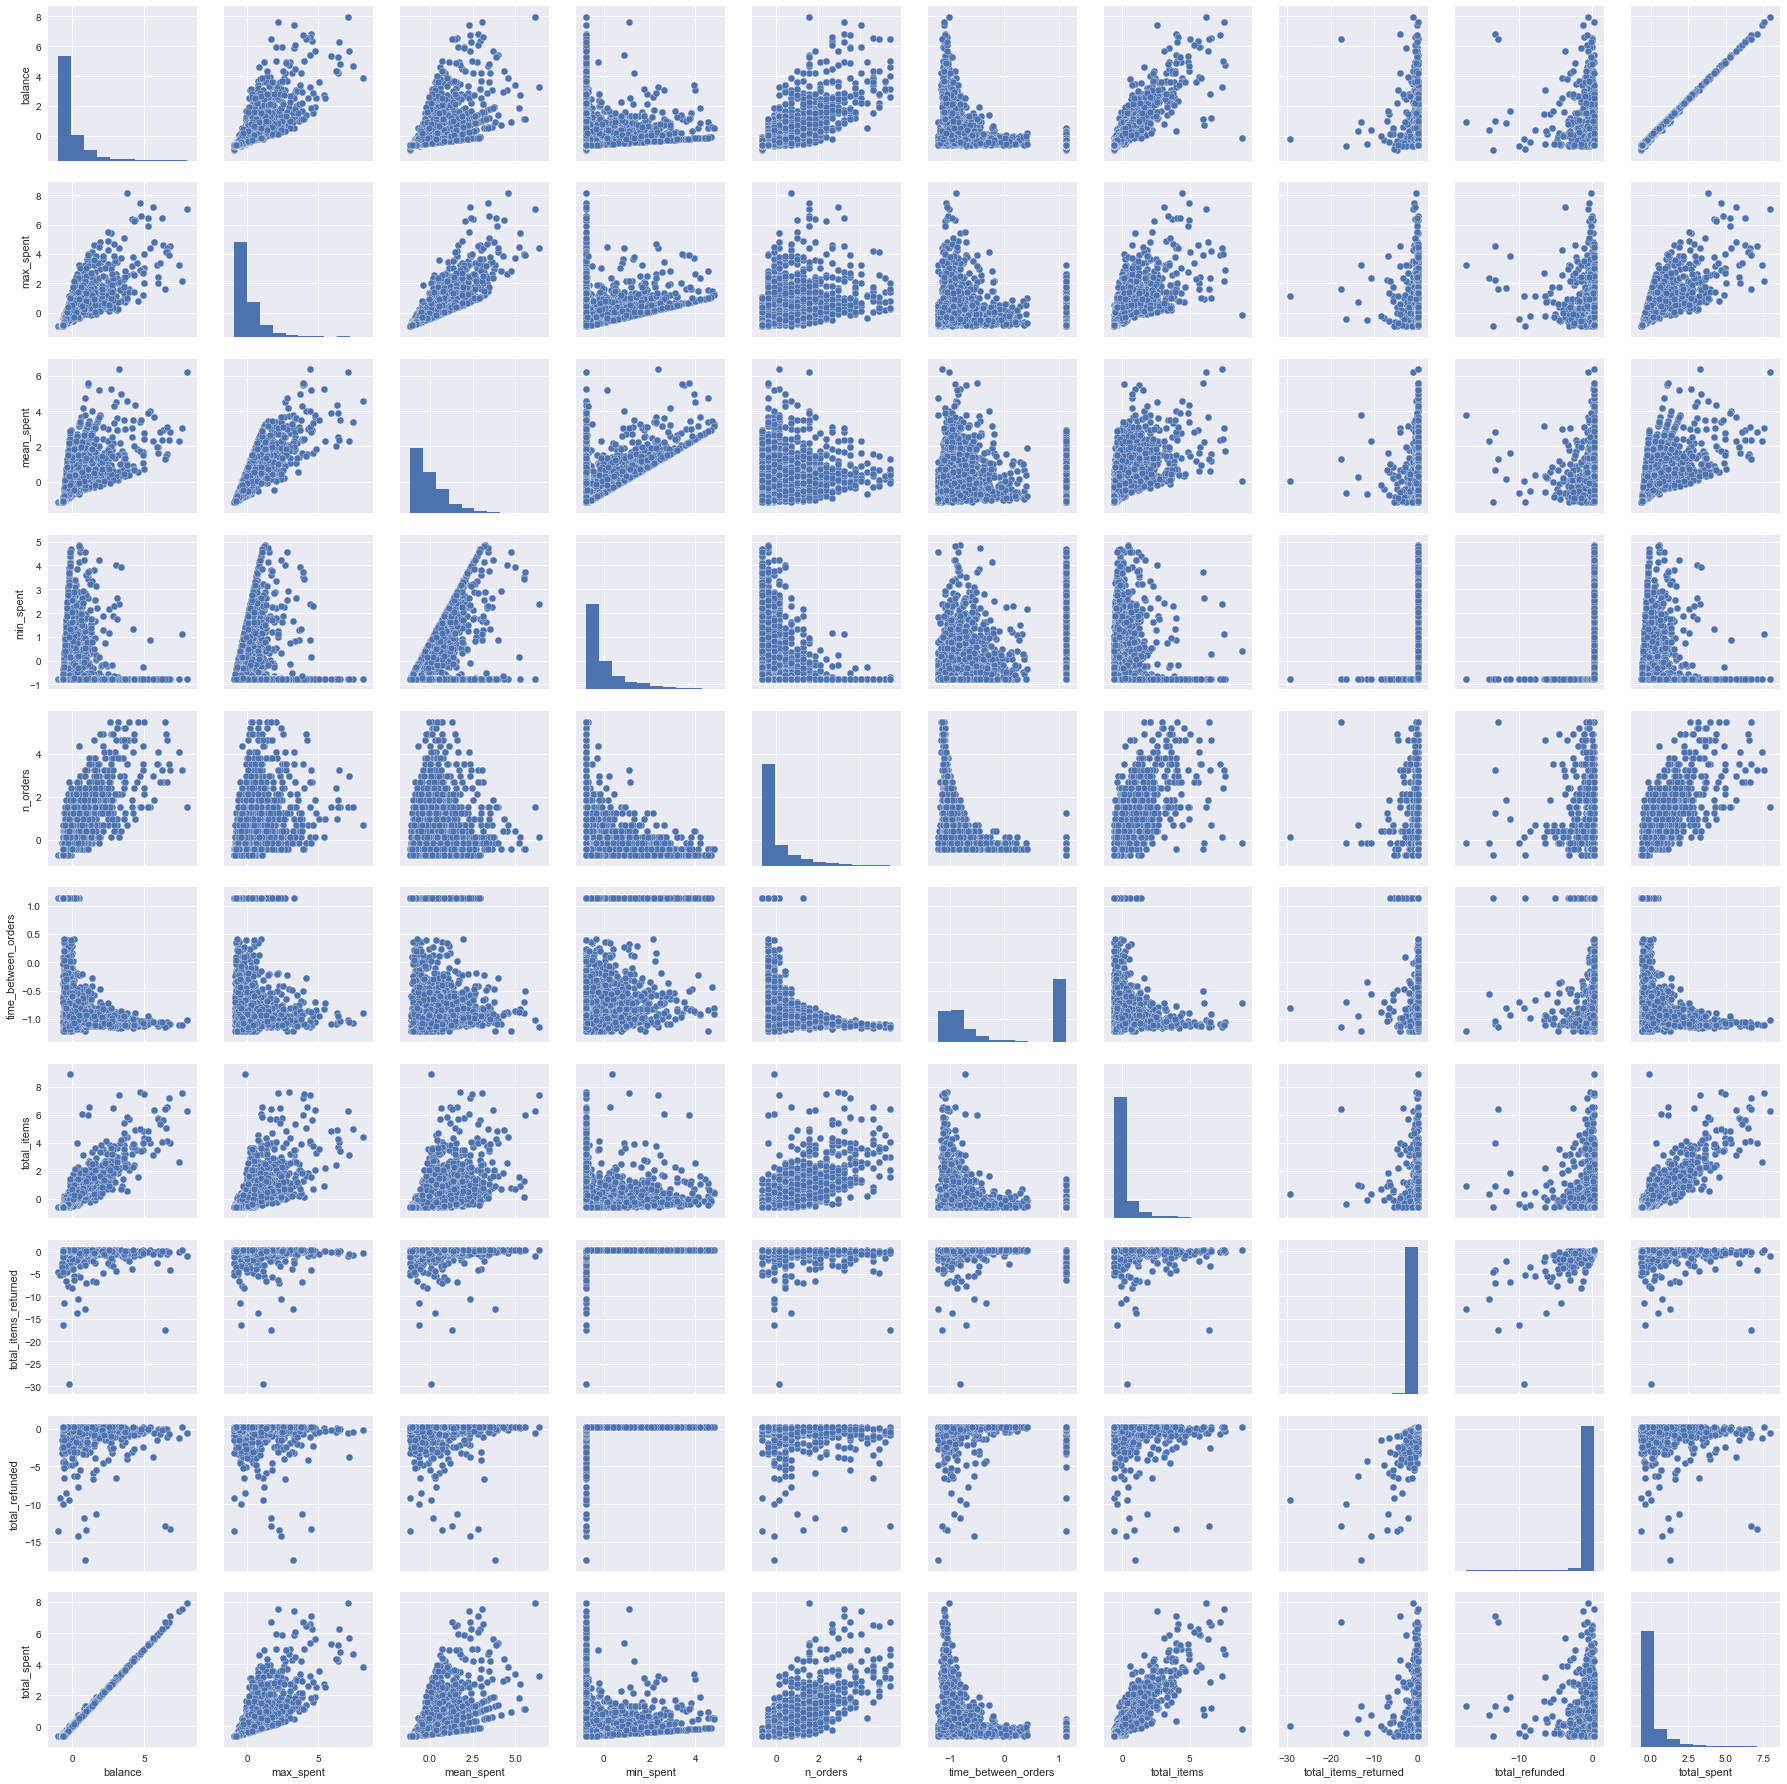

In [236]:
# Create a scatterplot matrix - make sure you only include the first 10 features!

ax = sns.pairplot(customers)
plt.show()

### Learning Activity - Create a correlation matrix and heatmap of correlations between the input features

It is often of great interest to investigate whether any of the variables in a multivariate dataset are significantly correlated. As we previously demonstrated, the different features (variables) in `customers` are not completely independent from each other. To quickly identify which features are related and to
what degree, it is useful to to calculate a correlation matrix that shows the correlation coefficient for each pair of variables. You can do this by using the `corr()` function from the `pandas` library:

In [237]:
# Calculate the correlation coefficients

corrmat = customers.corr()

To search for linear relationships between features across all pairs of features, you can use a heatmap
of correlations, which is simply a matrix of subplots whose colours represent the
degree of the correlations:

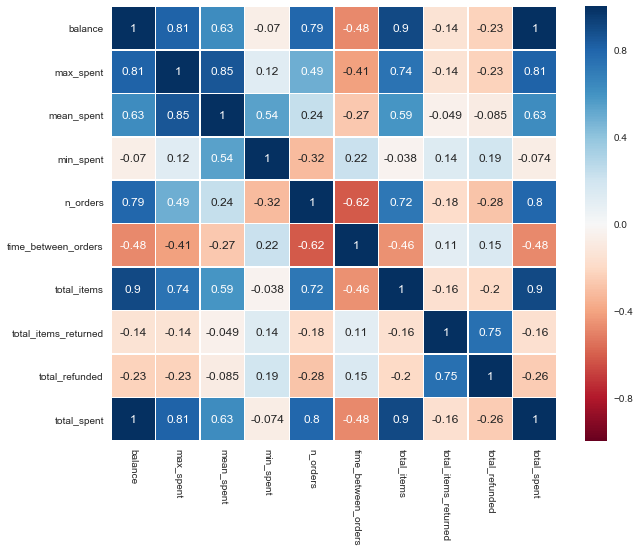

In [238]:
# Create a heatmap of the correlation coefficients

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corrmat, linewidths=0.5, cmap="RdBu", vmin=-1, vmax=1, annot=True)
plt.xticks(rotation=270) 
plt.show()

## Part 2: Feature selection and dimensionality reduction

The amount of data generated each day has been growing exponentially over the past years. This may result in the generation of a large number of input features, a subset of which may be highly correlated, repetitive, not very informative or even related to the particular study. Datasets with a large number of features are commonly referred to as high-dimensional datasets.

In this module, we will investigate a few strategies for reducing dimensionality while preserving the as much of the variation as possible/practical:
- Variance thresholding
- Principal component analysis
- Penalized regression (will be covered in greater detail later in the course)

## Variance thresholding

Variance thresholding is a simple approach that removes features with low variance in the features. Importantly, this thresholding does not take any classification into account, so we are examining the variance for a given feature across samples, not the variance relative to any output or class.

A trivial example of variance thresholding at work would be to remove any features with variance zero, i.e. the exact same value for every observation. Including this feature into a model adds additional complexity, but will clearly not provide any power to discriminate between classes in a supervised analysis, or contribute to clusters in an unsupervised analysis.

Variance thresholding is implemented as a transformer object in scikit-learn with a number of different options.

Let's join the `countries` dataframe we defined earlier with one-hot encoding to the `customers` dataframe and use `VarianceThreshold` from `sklearn.feature_selection` to select the subset of features with variance of at least 0.5.

First run the `.fit()` method of the `VarianceThreshold` object. Then you can use the `.get_support()` method to see an array of True/False for which columns pass this threshold.

In [249]:
#from sklearn.feature_selection import VarianceThreshold
#customers = customers.join(countries)
sel = VarianceThreshold(threshold=0.5)
sel.fit(customers)
columns_to_keep = sel.get_support()

customers.columns[~columns_to_keep]


Index(['Austria', 'Belgium', 'Finland', 'France', 'Germany', 'Italy', 'Norway',
       'Portugal', 'Spain', 'Switzerland', 'United Kingdom'],
      dtype='object')

Which features would be removed based on this strategy?
What are the drawbacks of this method?

Other methods for variance thresholding (including ones that use correlation with the class(es) of interest) are available: http://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold


## Principal Component Analysis 

Principal Component Analysis (PCA) as a technique for dimensionality reduction, data compression and feature extraction. The PCA algorithm reduces the initial number of possibly correlated variables into a new lower number of uncorrelated (orthogonal) variables, known as the Principal Components (PCs). PCA is commonly applied prior to unsupervised and supervised machine learning models to reduce the number of features used in the analysis, thereby reducing the likelihood of error.

Principal Component Analysis (PCA) is the most commonly used technique for dimensionality reduction, data compression and feature extraction. The PCA algorithm reduces the initial number of possibly correlated variables into a new lower number of uncorrelated variables, more specifically in a set of successive orthogonal components that explain a maximum amount of the variance, known as the Principal Components (PCs). 

### Learning Activity - Apply PCA in the input data using scikit-learn

In scikit-learn, PCA is implemented as a transformer object that learns _n_ components in its `fit()` method, and can be used on new data to project it on these components. More information on how to use the `pca()` function and its parameters can be found at http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [253]:
# Initialise the PCA object and create an index for each Principal Component
from sklearn.decomposition import PCA
pca = PCA()
ind = ['PC'+str(i+1) for i in range(customers.shape[1])]

The values of the Principal Components (scores) can be computed by the `fit_transform()` (alternatively, `fit()` followed by `transform()`) function. This function returns a matrix with the principal components, where the first column in the matrix contains the first principal component, the second column the second component, and so on.

In [259]:
# Create the PCA scores matrix and check the dimensionality of the PCA scores

scores = pca.fit_transform(customers)
scores = pd.DataFrame(scores, columns = ind, index = customers.index)

print(scores.shape)

(3126, 21)


You should think of these `scores` as the coordinates of the original data in a new space. Instead of `balance`, `n_orders`, etc. as dimensions, the new space has *linear combinations* of the original space as dimensions. E.g. PC1 might be `0.5 * balance + 0.2 * n_orders + 0.4 * max_spent + ... `

What are some potential drawbacks of this method?

Let's save these PCA scores to the `data` directory using `customers.to_csv()` and call it `customers_after_FEng_PCA_scores.csv`:

In [271]:
scores.to_csv('data/customers_after_FEng_PCA_scores.csv')

The PCA object also stores something called the `loadings` in `PCA.components_`

These `loadings` are the coefficients in the equation shown above. For instance, the first row of loadings corresponds to the coefficients you would multiply the original data points by to get data point in the new coordinate space.

In [260]:
# Create the PCA loadings matrix and show the loadings

loadings = pca.components_
loadings = pd.DataFrame(loadings, columns = customers.columns, index = ind)

print(loadings.head())

      balance  max_spent  mean_spent  min_spent  n_orders  \
PC1  0.426109   0.383391    0.306396  -0.019479  0.354616   
PC2 -0.038992  -0.191909   -0.415304  -0.541935  0.215263   
PC3 -0.089601   0.138607    0.303494   0.427831 -0.280826   
PC4  0.221619   0.018056   -0.149585  -0.235263  0.002210   
PC5  0.067881  -0.553280   -0.233044   0.586267  0.477204   

     time_between_orders  total_items  total_items_returned  total_refunded  \
PC1            -0.265225     0.401994             -0.115045       -0.153702   
PC2            -0.141881    -0.047127             -0.455782       -0.466696   
PC3             0.273682    -0.078533             -0.540374       -0.489292   
PC4             0.878820     0.219147              0.060352        0.019531   
PC5             0.053879     0.190743             -0.128068        0.054864   

     total_spent       ...         Belgium   Finland    France   Germany  \
PC1     0.427219       ...       -0.000010  0.000744  0.003242  0.004526   
PC2   

### Learning Activity: Calculate and plot the explained and cumulative variance 

But how much information have we lost? We can figure this out by looking at the explained and cumulative variance. The explained variance gives us the proportion of variance explained by each successive Principal Component. The cumulative variance  is obtained by adding the successive proportions of explained variance to obtain the total sum.

In [261]:
# Calculate the explained and cumulative variance

# Calculate the explained variance
exp_var = [i*100 for i in pca.explained_variance_ratio_]

# Calculate the cumulative variance
cum_var = np.cumsum(pca.explained_variance_ratio_*100)

# Combine both in a data frame
pca_var = pd.DataFrame(data={'exp_var': exp_var, 'cum_var': cum_var}, index=ind)
pca_var.head(10)

,cum_var,exp_var
PC1,50.517307,50.517307
PC2,69.336270,18.818963
PC3,83.334276,13.998006
PC4,89.552361,6.218085
PC5,93.428103,3.875741
PC6,95.934257,2.506154
PC7,97.421185,1.486928
PC8,98.277344,0.856160
PC9,99.062156,0.784811
PC10,99.450205,0.388049


We can also plot the explained variance using a barplot with seaborn:

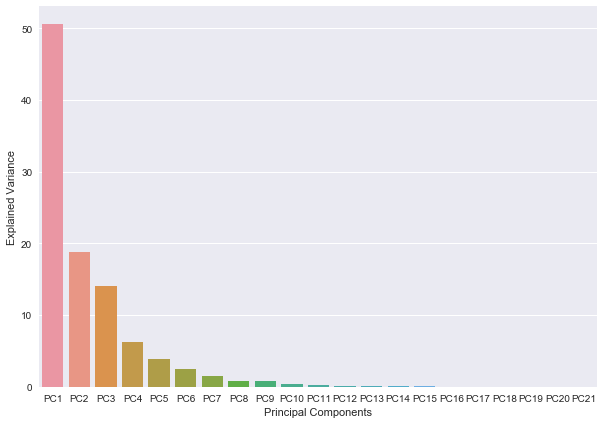

In [262]:
# Plot the explained variance per PC using a barplot

fig = plt.figure(figsize=(10,7))

ax = sns.barplot(x=pca_var.index, y='exp_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Explained Variance')
plt.show()

### Bonus Activity - Plot the cumulative variance

Plot the cumulative variance using a line plot, screeplot or barplot:

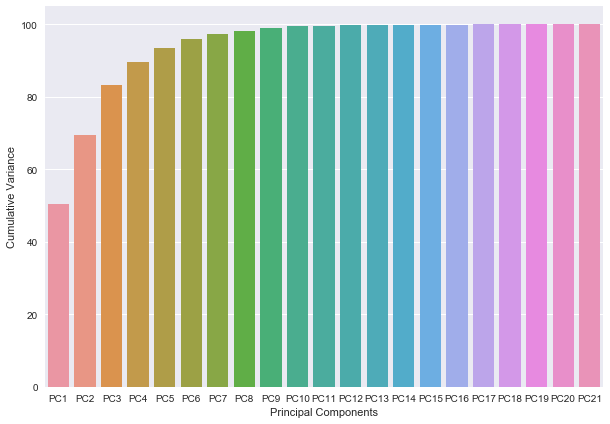

In [263]:
# Plot the cumulative variance per PC using a barplot

fig = plt.figure(figsize=(10,7))
ax = sns.barplot(x=pca_var.index, y='cum_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Cumulative Variance')
plt.show()

### Learning Activity - Plot the PCA loadings using a heatmap

Each Principal Component is a linear combination of all the variables and is perpendicular to every other component. Each variable in each component is multiplied by set of factors, the loading factors, which transforms the original data into this new component space. These loading factors serve as weights to see which parameters are most important for a particular principal component.


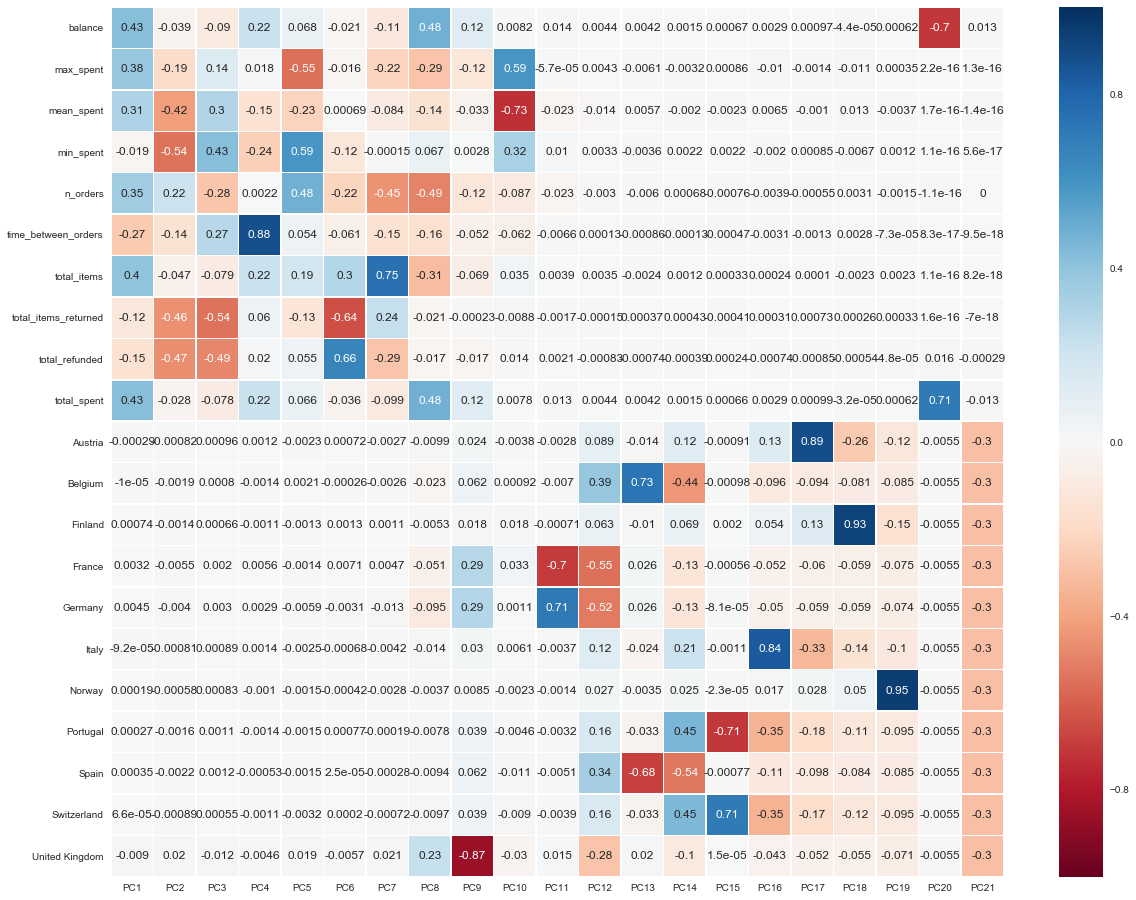

In [264]:
f, ax = plt.subplots(figsize=(20, 16))

ax = sns.heatmap(loadings.transpose(), linewidths=0.5, cmap="RdBu", vmin=-1, vmax=1, annot=True)
plt.show()

We can use this heatmap to see how the different features load onto the different components. For example, PC1 seems to be concerned mainly with volume of purchase (hence the heavy loadings of the item quantity and spending amounts), while PC 3 seems to be mainly concerned with the total refunded. In real life scenarios, these components can often be attributed to higher level concepts with respect to the features (e.g. length, breadth, height might form a "size" component) or domain-specific constructs. 

### Learning Activity - Create a scatterplot of the first two PCs

Often PCA scores plots are used in the hope that they will reveal clusters, trends and patterns in the data.
So, let us start by creating a scatterplot of the first two principal components (scores of PC1 and PC2):

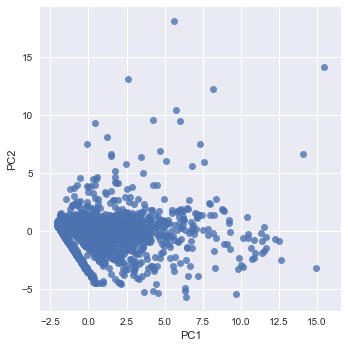

In [265]:
# Create a scatterplot of the first two Principal Components
# Remember, we will use scores (!) rather than customers as input

ax = sns.lmplot(x='PC1', y='PC2', data=scores, fit_reg=False)
plt.show()

### Adding classes and visualizing (bonus)

## END OF DAY 1